In [1]:
import os
import numpy as np
import pandas as pd

from utils.weather_util import read_all_weather, weather_data_preprocess
from utils.patient_util import read_patient_data, patient_data_preprocess
from process import get_data, filter_na, get_data_v2
from config import Config as config

In [2]:
p_df = read_patient_data('./data/patient.xlsx')
p_df = patient_data_preprocess(p_df)

In [3]:
w_df = read_all_weather()
w_df = weather_data_preprocess(w_df)

2022-10-16 18:45:06,047[INFO] - weather_util.py: read dir: ./data\57707毕节
2022-10-16 18:45:06,053[INFO] - weather_util.py: read ./data\57707毕节\57707-2010-3.txt
2022-10-16 18:45:06,058[INFO] - weather_util.py: read ./data\57707毕节\57707-2012-4.txt
2022-10-16 18:45:06,063[INFO] - weather_util.py: read ./data\57707毕节\57707-2012-7.txt
2022-10-16 18:45:06,068[INFO] - weather_util.py: read ./data\57707毕节\57707-2013-1.txt
2022-10-16 18:45:06,073[INFO] - weather_util.py: read ./data\57707毕节\57707-2014-1.txt
2022-10-16 18:45:06,082[INFO] - weather_util.py: read ./data\57707毕节\57707-2015-10.txt
2022-10-16 18:45:06,086[INFO] - weather_util.py: read ./data\57707毕节\57707-2015-2.txt
2022-10-16 18:45:06,091[INFO] - weather_util.py: read ./data\57707毕节\57707-2015-4.txt
2022-10-16 18:45:06,096[INFO] - weather_util.py: read ./data\57707毕节\57707-2015-6.txt
2022-10-16 18:45:06,101[INFO] - weather_util.py: read ./data\57707毕节\57707-2016-09.txt
2022-10-16 18:45:06,108[INFO] - weather_util.py: read ./data\577

2022-10-16 18:45:06,516[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2013-7.txt
2022-10-16 18:45:06,521[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2013-8.txt
2022-10-16 18:45:06,525[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2014-10.txt
2022-10-16 18:45:06,530[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2014-4.txt
2022-10-16 18:45:06,535[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2014-5.txt
2022-10-16 18:45:06,540[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2014-6.txt
2022-10-16 18:45:06,546[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2015-6.txt
2022-10-16 18:45:06,551[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2016-10.txt
2022-10-16 18:45:06,556[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2016-3.txt
2022-10-16 18:45:06,561[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2016-4.txt
2022-10-16 18:45:06,566[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2016-6.txt
2022-10-16 18:45:06,571[INFO] - weather_u

2022-10-16 18:45:06,979[INFO] - weather_util.py: read ./data\57909-册亨\57909-2013-4.txt
2022-10-16 18:45:06,984[INFO] - weather_util.py: read ./data\57909-册亨\57909-2015-6.txt
2022-10-16 18:45:06,988[INFO] - weather_util.py: read ./data\57909-册亨\57909-2015-9.txt
2022-10-16 18:45:06,993[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-1.txt
2022-10-16 18:45:07,000[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-10.txt
2022-10-16 18:45:07,005[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-11.txt
2022-10-16 18:45:07,010[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-12.txt
2022-10-16 18:45:07,015[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-2.txt
2022-10-16 18:45:07,019[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-3.txt
2022-10-16 18:45:07,025[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-4.txt
2022-10-16 18:45:07,029[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-7.txt
2022-10-16 18:45:07,034[INFO] - weather_

In [4]:
w_df.head()

,区站号,年份,月份,日期,日平均气温(℃),日气温日较差(℃),日最高气温(℃),日最低气温(℃),日平均相对湿度(%),日最小相对湿度(%),...,日第1层冻土上界(cm),日第1层冻土下界(cm),日平均草面温度(℃),日最高草面温度(℃),日最低草面温度(℃),日均露点温度(℃),日太阳总辐射(MJ/m2),日净全辐射(MJ/m2),date,area
0,57707,2010,3,1,16.2,20.6,28.3,7.7,58.0,13.0,...,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,2010-03-01,毕节
1,57707,2010,3,2,14.2,13.2,22.5,9.3,62.0,19.0,...,NaN,NaN,NaN,NaN,NaN,6.4,NaN,NaN,2010-03-02,毕节
2,57707,2010,3,3,8.6,7.7,14.0,6.3,88.0,73.0,...,NaN,NaN,NaN,NaN,NaN,6.7,NaN,NaN,2010-03-03,毕节
3,57707,2010,3,4,8.6,10.0,15.5,5.5,86.0,54.0,...,NaN,NaN,NaN,NaN,NaN,5.9,NaN,NaN,2010-03-04,毕节
4,57707,2010,3,5,7.4,9.7,14.7,5.0,83.0,56.0,...,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,2010-03-05,毕节


In [5]:
p_df[['地址', '日期']].drop_duplicates()

,地址,日期
0,小河,2017-03-19
1,施秉,2012-05-10
2,施秉,2012-05-28
3,施秉,2013-06-28
4,小河,2014-01-25
5,福泉,2013-01-01
6,福泉,2015-01-01
7,六枝,2018-12-01
8,施秉,2016-06-25
9,施秉,2012-03-04


In [2]:
df = get_data_v2()

2022-10-16 18:47:02,805[INFO] - weather_util.py: read dir: ./data\57707毕节
2022-10-16 18:47:02,809[INFO] - weather_util.py: read ./data\57707毕节\57707-2010-3.txt
2022-10-16 18:47:02,815[INFO] - weather_util.py: read ./data\57707毕节\57707-2012-4.txt
2022-10-16 18:47:02,820[INFO] - weather_util.py: read ./data\57707毕节\57707-2012-7.txt
2022-10-16 18:47:02,825[INFO] - weather_util.py: read ./data\57707毕节\57707-2013-1.txt
2022-10-16 18:47:02,833[INFO] - weather_util.py: read ./data\57707毕节\57707-2014-1.txt
2022-10-16 18:47:02,838[INFO] - weather_util.py: read ./data\57707毕节\57707-2015-10.txt
2022-10-16 18:47:02,842[INFO] - weather_util.py: read ./data\57707毕节\57707-2015-2.txt
2022-10-16 18:47:02,847[INFO] - weather_util.py: read ./data\57707毕节\57707-2015-4.txt
2022-10-16 18:47:02,852[INFO] - weather_util.py: read ./data\57707毕节\57707-2015-6.txt
2022-10-16 18:47:02,858[INFO] - weather_util.py: read ./data\57707毕节\57707-2016-09.txt
2022-10-16 18:47:02,863[INFO] - weather_util.py: read ./data\577

2022-10-16 18:47:03,291[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2013-7.txt
2022-10-16 18:47:03,296[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2013-8.txt
2022-10-16 18:47:03,301[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2014-10.txt
2022-10-16 18:47:03,306[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2014-4.txt
2022-10-16 18:47:03,311[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2014-5.txt
2022-10-16 18:47:03,316[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2014-6.txt
2022-10-16 18:47:03,322[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2015-6.txt
2022-10-16 18:47:03,327[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2016-10.txt
2022-10-16 18:47:03,332[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2016-3.txt
2022-10-16 18:47:03,337[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2016-4.txt
2022-10-16 18:47:03,342[INFO] - weather_util.py: read ./data\57739 玉屏\57739-2016-6.txt
2022-10-16 18:47:03,347[INFO] - weather_u

2022-10-16 18:47:03,762[INFO] - weather_util.py: read ./data\57909-册亨\57909-2013-4.txt
2022-10-16 18:47:03,766[INFO] - weather_util.py: read ./data\57909-册亨\57909-2015-6.txt
2022-10-16 18:47:03,771[INFO] - weather_util.py: read ./data\57909-册亨\57909-2015-9.txt
2022-10-16 18:47:03,776[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-1.txt
2022-10-16 18:47:03,783[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-10.txt
2022-10-16 18:47:03,788[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-11.txt
2022-10-16 18:47:03,794[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-12.txt
2022-10-16 18:47:03,799[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-2.txt
2022-10-16 18:47:03,803[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-3.txt
2022-10-16 18:47:03,808[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-4.txt
2022-10-16 18:47:03,813[INFO] - weather_util.py: read ./data\57909-册亨\57909-2016-7.txt
2022-10-16 18:47:03,818[INFO] - weather_

In [1]:
from v1_code.data_process import DataProcessor
DataProcessor.initialize()

df = DataProcessor.get_label()
feature_names = DataProcessor.filter_na_feature(df)

2022-11-20 12:22:59,245[INFO] - data_process.py: DataProcessor initialize...
2022-11-20 12:22:59,309[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57707毕节
2022-11-20 12:22:59,359[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57713-遵义红花岗
2022-11-20 12:22:59,447[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57722 湄潭
2022-11-20 12:22:59,511[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57737 施秉
2022-11-20 12:22:59,616[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57739 玉屏
2022-11-20 12:22:59,703[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57807-六枝
2022-11-20 12:22:59,861[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57816-小河
2022-11-20 12:22:59,904[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57821-福泉
2022-11-20 12:22:59,977[INFO] - w

### 归一化

In [2]:
feature = df[feature_names]
label = df['label']

In [3]:
from sklearn.preprocessing import StandardScaler
f = feature.fillna(method='bfill').fillna(method='ffill')
f = StandardScaler().fit_transform(f)
print(f)

[[-0.97187817 -1.3159846  -1.28233365 ...  0.59141904  0.32789916
  -0.58722197]
 [ 0.78773387  0.6862403   0.80449909 ...  0.59141904  0.32789916
   0.57445997]
 [ 1.36123705  0.91120939  1.37157321 ...  0.59141904  0.32789916
   1.14239336]
 ...
 [ 0.80076803  0.64124648  0.86120651 ...  0.14067456  0.80081585
   0.85842667]
 [ 0.35760648 -0.73106497  0.13535164 ...  0.59905878  0.67300053
   0.50992208]
 [ 1.32213456  0.14631448  1.33754876 ...  0.63725746  1.54214471
   1.46508279]]


### Lasso SCAD

In [4]:
from sklearn.linear_model import Lasso
from scad.scad_class import Scad


model = Lasso()
model.fit(f, label.values)
print('Lasso:')
print(model.coef_)

print('SCAD:')
scad = Scad(f, label.values)
res = scad.cal_weight_with_scad(f, label.values)
print(list(res))

Lasso:
[-0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0.  0.
  0. -0.  0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0.
  0.  0. -0. -0.]
SCAD:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### person相关系数

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
f = pd.DataFrame(f, columns=feature.columns)
f['label'] = label
res_corr = f.corr()['label'].to_dict()

In [15]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df[feature_names], df['label'], random_state=42, shuffle=True, stratify=df['label'])

In [13]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56        72
           1       0.43      0.34      0.38        61

    accuracy                           0.49       133
   macro avg       0.48      0.48      0.47       133
weighted avg       0.48      0.49      0.48       133



In [28]:
year_count = df.groupby('年份').count()['label'].to_dict()
date_count = df.groupby('date').count()['label'].to_dict()

In [47]:
df_count = pd.DataFrame({'date': list(date_count.keys()), 'date_count': list(date_count.values())})
df_count['year_count'] = df_count['date'].apply(lambda x: year_count[x.year])
df_count['label'] = df_count['date_count'] / df_count['year_count']

<AxesSubplot:xlabel='date', ylabel='label'>

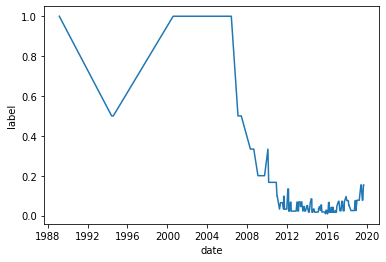

In [54]:
sns.lineplot(x='date',y='label', data=df_count)

In [1]:
from data_process import DataProcessor

In [2]:
DataProcessor.initialize()

2022-10-29 23:03:11,276[INFO] - data_process.py: DataProcessor initialize...
2022-10-29 23:03:11,329[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57707毕节
2022-10-29 23:03:11,379[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57713-遵义红花岗
2022-10-29 23:03:11,473[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57722 湄潭
2022-10-29 23:03:11,544[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57737 施秉
2022-10-29 23:03:11,671[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57739 玉屏
2022-10-29 23:03:11,750[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57807-六枝
2022-10-29 23:03:11,891[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57816-小河
2022-10-29 23:03:11,936[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57821-福泉
2022-10-29 23:03:12,012[INFO] - w

In [3]:
df = DataProcessor.get_label()

In [4]:
df.head()

,区站号,年份,月份,日平均气温(℃),日气温日较差(℃),日最高气温(℃),日最低气温(℃),日平均相对湿度(%),日最小相对湿度(%),日平均气压(hpa),...,日第1层冻土下界(cm),日平均草面温度(℃),日最高草面温度(℃),日最低草面温度(℃),日均露点温度(℃),日太阳总辐射(MJ/m2),日净全辐射(MJ/m2),date,area,label
0,57713.0,1989.0,3.0,8.9,2.0,9.8,7.8,91.0,84.0,917.9,...,NaN,NaN,NaN,NaN,7.5,NaN,NaN,1989-03-01,遵义红花岗,1
1,57713.0,1994.0,6.0,22.4,10.9,28.2,17.3,72.0,48.0,913.5,...,NaN,NaN,NaN,NaN,16.5,NaN,NaN,1994-06-01,遵义红花岗,1
2,57713.0,1994.0,8.0,26.8,11.9,33.2,21.3,72.0,48.0,911.2,...,NaN,NaN,NaN,NaN,20.9,NaN,NaN,1994-08-01,遵义红花岗,1
3,57922.0,2000.0,8.0,22.6,5.4,26.3,20.9,78.0,56.0,894.2,...,NaN,NaN,NaN,NaN,18.5,NaN,NaN,2000-08-01,独山,1
4,57922.0,2001.0,2.0,3.2,4.7,6.5,1.8,82.0,75.0,902.6,...,NaN,NaN,NaN,NaN,0.3,NaN,NaN,2001-02-01,独山,1


In [11]:
DataProcessor.weather_df.head()

,区站号,年份,月份,日期,日平均气温(℃),日气温日较差(℃),日最高气温(℃),日最低气温(℃),日平均相对湿度(%),日最小相对湿度(%),...,日第1层冻土上界(cm),日第1层冻土下界(cm),日平均草面温度(℃),日最高草面温度(℃),日最低草面温度(℃),日均露点温度(℃),日太阳总辐射(MJ/m2),日净全辐射(MJ/m2),date,area
0,57707,2010,3,1,16.2,20.6,28.3,7.7,58.0,13.0,...,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,2010-03-01,毕节
1,57707,2010,3,2,14.2,13.2,22.5,9.3,62.0,19.0,...,NaN,NaN,NaN,NaN,NaN,6.4,NaN,NaN,2010-03-02,毕节
2,57707,2010,3,3,8.6,7.7,14.0,6.3,88.0,73.0,...,NaN,NaN,NaN,NaN,NaN,6.7,NaN,NaN,2010-03-03,毕节
3,57707,2010,3,4,8.6,10.0,15.5,5.5,86.0,54.0,...,NaN,NaN,NaN,NaN,NaN,5.9,NaN,NaN,2010-03-04,毕节
4,57707,2010,3,5,7.4,9.7,14.7,5.0,83.0,56.0,...,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,2010-03-05,毕节


In [ ]:
new_df = DataProcessor.slide_feature(df)

In [1]:
from utils.weather_util import read_weather_xls, get_one_day_weather
from utils.patient_util import read_patient_xls

In [2]:
path = './data/Appendix-C2/data5.xls'

In [3]:
df = read_weather_xls(path, sheet_name='07')

In [4]:
df = get_one_day_weather(2007, 3, 12)

In [5]:
df = read_patient_xls()

In [18]:
from data_process import DataProcessor

In [19]:
d = DataProcessor()

2022-11-19 18:31:20,096[INFO] - weather_util.py: get all day weather
2022-11-19 18:31:20,106[INFO] - weather_util.py: begin to year 2007
2022-11-19 18:31:20,106[INFO] - weather_util.py: begin to month 1
2022-11-19 18:31:21,061[INFO] - weather_util.py: begin to month 2
2022-11-19 18:31:22,018[INFO] - weather_util.py: begin to month 3
2022-11-19 18:31:23,050[INFO] - weather_util.py: begin to month 4
2022-11-19 18:31:24,034[INFO] - weather_util.py: begin to month 5
2022-11-19 18:31:25,015[INFO] - weather_util.py: begin to month 6
2022-11-19 18:31:26,008[INFO] - weather_util.py: begin to month 7
2022-11-19 18:31:27,011[INFO] - weather_util.py: begin to month 8
2022-11-19 18:31:28,024[INFO] - weather_util.py: begin to month 9
2022-11-19 18:31:29,000[INFO] - weather_util.py: begin to month 10
2022-11-19 18:31:29,993[INFO] - weather_util.py: begin to month 11
2022-11-19 18:31:30,970[INFO] - weather_util.py: begin to month 12
2022-11-19 18:31:31,931[INFO] - weather_util.py: begin to year 2008


In [8]:
label = d.get_label()

In [9]:
label.corr()

,label,Sex,Age,Occupation,year,month,day,Aver RH,Aver pres,Aver temp,High pres,High temp,Low pres,Low temp,Min RH,Diff temp,Diff pres
label,1.000000,-0.002755,0.008186,-0.013420,-0.018992,-0.142506,-0.321948,-0.108374,0.062264,-0.072939,0.063435,-0.063179,0.060648,-0.080863,-0.073253,0.050119,0.020709
Sex,-0.002755,1.000000,0.085083,-0.108425,0.014650,-0.002903,0.000600,-0.000022,0.008827,-0.008949,0.009135,-0.007908,0.008760,-0.009185,-0.002595,0.003497,0.002883
Age,0.008186,0.085083,1.000000,-0.020786,-0.006053,-0.008658,-0.003152,-0.017051,0.016145,-0.016130,0.015894,-0.014612,0.015995,-0.016726,-0.009703,0.005729,0.002217
Occupation,-0.013420,-0.108425,-0.020786,1.000000,-0.025700,0.011698,0.011905,-0.009677,0.009824,-0.006371,0.008683,-0.005444,0.011107,-0.007342,-0.004841,0.005531,-0.007727
year,-0.018992,0.014650,-0.006053,-0.025700,1.000000,-0.045409,-0.006344,0.105197,-0.020739,-0.004191,-0.011211,0.001018,-0.034737,-0.008111,0.029900,0.027099,0.085713
month,-0.142506,-0.002903,-0.008658,0.011698,-0.045409,1.000000,0.006475,0.148733,-0.147934,0.347853,-0.171878,0.334720,-0.113659,0.345491,0.069111,-0.019704,-0.244650
day,-0.321948,0.000600,-0.003152,0.011905,-0.006344,0.006475,1.000000,-0.004511,-0.007375,0.013959,-0.001916,0.004842,-0.013967,0.022463,0.032261,-0.052064,0.044530
Aver RH,-0.108374,-0.000022,-0.017051,-0.009677,0.105197,0.148733,-0.004511,1.000000,-0.254913,0.206093,-0.249555,0.141820,-0.244545,0.276213,0.625870,-0.393232,-0.059321
Aver pres,0.062264,0.008827,0.016145,0.009824,-0.020739,-0.147934,-0.007375,-0.254913,1.000000,-0.875002,0.990863,-0.851546,0.989717,-0.874953,-0.249665,0.038283,0.165788
Aver temp,-0.072939,-0.008949,-0.016130,-0.006371,-0.004191,0.347853,0.013959,0.206093,-0.875002,1.000000,-0.897026,0.983857,-0.840560,0.984060,0.141956,0.035341,-0.356337


In [20]:
import xgboost as xgb
import matplotlib.pyplot as plt
# df = d.get_train_test_data()
df = d.get_label()

In [21]:
train = df.iloc[:1096, :]
test = df.iloc[1096:, :]
feature_col = d.weather_col + ['month', 'day', 'Age', 'Occupation', 'Diff temp', 'Diff pres']

In [22]:
model = xgb.XGBRegressor(learning_rate=0.3, n_estimators=100, max_depth=9)

In [23]:
model.fit(train[feature_col], train['label'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

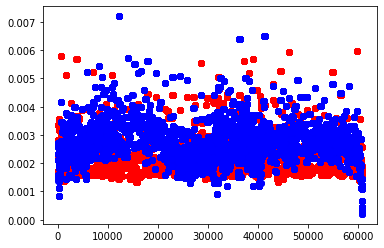

In [24]:
x = range(test.shape[0])
plt.scatter(x, model.predict(test[feature_col]), color='red')
plt.scatter(x, test['label'], color='blue')

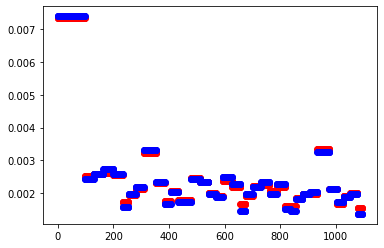

In [25]:
x = range(train.shape[0])
plt.scatter(x, model.predict(train[feature_col]), color='red')
plt.scatter(x, train['label'], color='blue')

In [1]:
from v1_code.data_process import DataProcessor as DataProcessor_v1
from data_process import DataProcessor

In [2]:
DataProcessor_v1.initialize()
d = DataProcessor()

2022-11-27 10:59:48,737[INFO] - data_process.py: DataProcessor initialize...
2022-11-27 10:59:48,814[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57707毕节
2022-11-27 10:59:48,871[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57713-遵义红花岗
2022-11-27 10:59:48,979[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57722 湄潭
2022-11-27 10:59:49,065[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57737 施秉
2022-11-27 10:59:49,201[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57739 玉屏
2022-11-27 10:59:49,306[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57807-六枝
2022-11-27 10:59:49,481[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57816-小河
2022-11-27 10:59:49,529[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57821-福泉
2022-11-27 10:59:49,625[INFO] - w

In [6]:
DataProcessor_v1.df

,地址,日期_x,区站号,年份,月份,日期_y,日平均气温(℃),日气温日较差(℃),日最高气温(℃),日最低气温(℃),日平均相对湿度(%),日最小相对湿度(%),日平均气压(hpa),日最高气压(hpa),日最低气压(hpa),日平均海平面气压(hpa),日平均水汽压(hpa),日最高水汽压(hpa),日最低水汽压(hpa),日降水量(mm),日日照时数(小时),日平均风速(m/s),日最大风速(m/s),日极大风速(m/s),日平均总云量(成),日平均低云量(成),日最小能见度(m),日小型蒸发量(mm),日大型蒸发量(mm),日积雪深度(cm),日雪压(g/cm2),日平均地表温度(℃),日最高地表温度(℃),日最低地表温度(℃),日平均5cm地温(℃),日平均10cm地温(℃),日平均15cm地温(℃),日平均20cm地温(℃),日平均40cm地温(℃),日平均0.8m地温(℃),日平均1.6m地温(℃),日平均3.2m地温(℃),日第1层冻土上界(cm),日第1层冻土下界(cm),日平均草面温度(℃),日最高草面温度(℃),日最低草面温度(℃),日均露点温度(℃),日太阳总辐射(MJ/m2),日净全辐射(MJ/m2),date,area,日气压日较差(hpa)
0,小河,2017-03-19,57816.0,2017.0,3.0,19.0,9.9,9.0,15.4,6.4,99.0,91.0,876.2,878.2,872.8,1014.3,12.3,16.0,9.6,2.8,0.0,2.4,4.7,8.3,9.7,9.7,81.0,NaN,0.8,0.0,0.0,11.0,17.9,7.7,11.0,10.7,10.5,10.3,11.1,11.6,13.5,15.7,NaN,NaN,10.7,18.0,7.4,9.8,NaN,NaN,2017-03-19,小河,5.4
1,施秉,2012-05-10,57737.0,2012.0,5.0,10.0,23.2,4.7,26.1,21.4,88.0,74.0,948.6,950.9,945.9,1010.2,24.8,27.1,23.4,NaN,0.4,1.7,3.7,5.4,10.0,6.7,11000.0,3.3,NaN,0.0,0.0,23.4,29.7,20.4,23.0,22.8,22.9,22.5,21.9,19.7,16.9,15.6,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,2012-05-10,施秉,5.0
2,施秉,2012-05-28,57737.0,2012.0,5.0,28.0,23.0,6.4,26.3,19.9,90.0,78.0,947.0,948.8,944.1,1008.5,25.2,27.2,23.2,0.3,0.0,1.0,3.8,6.4,10.0,10.0,3000.0,2.8,NaN,0.0,0.0,23.1,29.4,19.8,22.4,22.0,22.0,21.5,20.8,20.0,18.4,16.6,NaN,NaN,NaN,NaN,NaN,21.2,NaN,NaN,2012-05-28,施秉,4.7
3,施秉,2013-06-28,57737.0,2013.0,6.0,28.0,26.6,12.7,33.8,21.1,74.0,40.0,940.0,942.5,937.2,1000.4,24.7,27.6,22.1,0.0,7.8,1.3,4.5,7.2,3.7,1.0,9000.0,6.6,NaN,0.0,0.0,30.3,48.4,21.1,27.9,27.3,26.8,25.8,25.3,24.0,20.8,18.1,NaN,NaN,NaN,NaN,NaN,20.9,NaN,NaN,2013-06-28,施秉,5.3
4,小河,2014-01-25,57816.0,2014.0,1.0,25.0,9.5,11.8,16.2,4.4,62.0,35.0,879.7,881.9,875.6,1018.6,7.1,8.0,6.4,0.0,6.8,1.5,5.6,9.0,3.3,3.3,2218.0,NaN,1.9,0.0,0.0,11.6,31.3,0.6,10.0,9.7,9.5,9.3,9.3,10.2,13.0,16.4,NaN,NaN,10.4,28.7,-0.9,2.0,NaN,NaN,2014-01-25,小河,6.3
5,福泉,2013-01-01,57821.0,2013.0,1.0,1.0,2.7,12.5,10.3,-2.2,67.0,32.0,912.4,915.3,908.5,1022.4,4.7,5.5,3.9,0.0,2.5,1.1,3.4,4.6,6.7,5.3,8000.0,1.5,NaN,0.0,0.0,3.9,19.0,-2.5,4.3,4.8,5.5,6.2,7.5,10.8,14.5,16.9,NaN,NaN,NaN,NaN,NaN,-3.7,NaN,NaN,2013-01-01,福泉,6.8
6,福泉,2015-01-01,57821.0,2015.0,1.0,1.0,7.8,5.9,12.0,6.1,50.0,43.0,920.5,923.6,917.6,1029.3,5.3,6.9,4.8,0.0,0.0,1.9,2.7,5.5,NaN,NaN,4018.0,NaN,1.9,0.0,0.0,9.7,21.2,4.4,9.4,10.2,10.7,11.0,11.3,12.7,15.4,17.7,NaN,NaN,8.2,17.7,1.9,-2.0,NaN,NaN,2015-01-01,福泉,6.0
7,六枝,2018-12-01,57807.0,2018.0,12.0,1.0,10.9,6.9,15.5,8.6,84.0,64.0,865.7,869.6,861.1,1018.1,10.9,12.3,9.9,0.2,2.2,1.0,3.5,6.7,NaN,NaN,2460.0,NaN,1.6,0.0,0.0,12.9,26.9,9.6,13.9,14.5,14.8,15.0,14.5,15.1,16.5,17.7,NaN,NaN,11.2,28.4,7.3,8.2,NaN,NaN,2018-12-01,六枝,8.5
8,施秉,2016-06-25,57737.0,2016.0,6.0,25.0,25.1,7.3,30.9,23.6,78.0,58.0,947.0,948.5,942.1,1008.2,24.7,28.9,23.2,NaN,1.5,1.8,3.6,6.8,NaN,NaN,7154.0,3.9,NaN,0.0,0.0,29.2,51.2,24.2,27.7,27.5,27.2,26.9,25.4,23.6,20.8,18.3,NaN,NaN,27.2,45.3,23.3,20.9,NaN,NaN,2016-06-25,施秉,6.4
9,施秉,2012-03-04,57737.0,2012.0,3.0,4.0,4.1,0.9,4.6,3.7,96.0,92.0,949.7,953.7,945.6,1015.8,7.8,8.3,7.6,11.7,0.0,1.9,3.7,6.0,10.0,10.0,12000.0,0.6,NaN,0.0,0.0,4.4,6.3,3.7,4.8,5.3,5.9,6.1,8.5,10.1,12.5,15.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,2012-03-04,施秉,8.1


In [7]:
d.df

,Sex,Age,Occupation,Time of incidence,Report time,date,year,month,day,Aver RH,Aver pres,Aver temp,High pres,High temp,Low pres,Low temp,Min RH,Diff temp,Diff pres
0,1.0,55.0,1.0,2007/01/01,2007-12-01 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2
1,1.0,61.0,2.0,2007/01/01,2007-01-14 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2
2,1.0,70.0,NaN,2007/01/01,2007-07-23 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2
3,1.0,70.0,NaN,2007/01/01,2007-02-01 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2
4,1.0,71.0,1.0,2007/01/01,2007-01-18 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2
5,1.0,78.0,1.0,2007/01/01,2007-01-01 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2
6,1.0,79.0,1.0,2007/01/01,2007-09-29 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2
7,2.0,53.0,1.0,2007/01/01,2007-01-20 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2
8,2.0,61.0,NaN,2007/01/01,2007-07-20 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2
9,2.0,74.0,1.0,2007/01/01,2007-01-02 00:00:00,2007-01-01,2007,1,1,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2


In [1]:
from models.baseline import concat_data, get_label

In [2]:
df = concat_data()

2022-11-27 16:40:38,032[INFO] - data_process.py: DataProcessor initialize...
2022-11-27 16:40:38,085[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57707毕节
2022-11-27 16:40:38,136[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57713-遵义红花岗
2022-11-27 16:40:38,230[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57722 湄潭
2022-11-27 16:40:38,300[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57737 施秉
2022-11-27 16:40:38,397[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57739 玉屏
2022-11-27 16:40:38,487[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57807-六枝
2022-11-27 16:40:38,630[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57816-小河
2022-11-27 16:40:38,676[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57821-福泉
2022-11-27 16:40:38,760[INFO] - w

In [3]:
label = get_label(df)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from models.baseline import concat_data, get_label
df = concat_data()
df = get_label(df)
feature_col = ['Aver RH', 'Aver pres', 'Aver temp', 'High pres', 'High temp', 'Low pres', 'Low temp', 'Min RH',
               'Diff temp', 'Diff pres']
label_col = 'label'

2022-12-11 16:56:54,550[INFO] - data_process.py: DataProcessor initialize...
2022-12-11 16:56:54,592[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57707毕节
2022-12-11 16:56:54,642[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57713-遵义红花岗
2022-12-11 16:56:54,729[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57722 湄潭
2022-12-11 16:56:54,808[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57737 施秉
2022-12-11 16:56:54,924[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57739 玉屏
2022-12-11 16:56:55,005[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57807-六枝
2022-12-11 16:56:55,148[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57816-小河
2022-12-11 16:56:55,198[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57821-福泉
2022-12-11 16:56:55,276[INFO] - w

In [3]:
df.head()

,date,label,Aver RH,Aver pres,Aver temp,High pres,High temp,Low pres,Low temp,Min RH,Diff temp,Diff pres,year
0,2007-01-01,0.007399,86.0,1025.1,8.1,1028.5,9.9,1023.3,7.4,71.0,2.5,5.2,2007
1,2007-01-02,0.002416,84.0,1025.2,6.5,1026.7,7.4,1023.5,6.0,73.0,1.4,3.2,2007
2,2007-01-03,0.002567,86.0,1026.1,5.0,1027.8,6.9,1025.1,4.2,77.0,2.7,2.7,2007
3,2007-01-04,0.002718,82.0,1027.1,5.9,1029.2,7.4,1025.7,4.2,78.0,3.2,3.5,2007
4,2007-01-05,0.002567,84.0,1027.1,5.0,1029.0,6.5,1025.2,4.3,76.0,2.2,3.8,2007


<AxesSubplot:xlabel='label', ylabel='Count'>

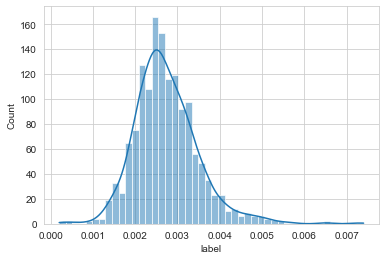

In [37]:
sns.histplot(data=df, x='label', kde=True)

<AxesSubplot:xlabel='date', ylabel='label'>

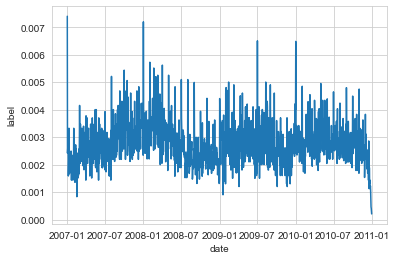

In [38]:
sns.lineplot(data=df, x='date', y='label')

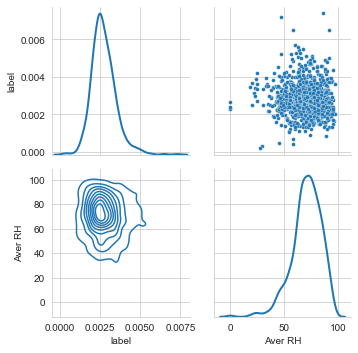

In [39]:
g = sns.PairGrid(df[['label', 'Aver RH']], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from models.baseline import concat_data, get_label, split_train_test_data, multi_linear_model, lgb_model
from models.metrics import evaluate

df = concat_data()
df = get_label(df)
train_df, test_df = split_train_test_data(df)
feature_col = ['Aver RH', 'Aver pres', 'Aver temp', 'High pres', 'High temp', 'Low pres', 'Low temp', 'Min RH',
               'Diff temp', 'Diff pres']
label_col = 'label'

2023-02-12 15:48:13,315[INFO] - data_process.py: DataProcessor initialize...
2023-02-12 15:48:13,365[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57707毕节
2023-02-12 15:48:13,419[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57713-遵义红花岗
2023-02-12 15:48:13,543[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57722 湄潭
2023-02-12 15:48:13,615[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57737 施秉
2023-02-12 15:48:13,739[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57739 玉屏
2023-02-12 15:48:13,826[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57807-六枝
2023-02-12 15:48:13,986[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57816-小河
2023-02-12 15:48:14,035[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57821-福泉
2023-02-12 15:48:14,122[INFO] - w

In [6]:
from scad.scad_class import Scad

x = df[feature_col].values
y = df[label_col].values
scad = Scad(x, y)

In [7]:
scad.gauss_seidel(x, y)

array([-0.02296699, -0.00133711, -0.02275065, -0.00119579, -0.02235585,
       -0.00074206,  0.0469168 , -0.00728086, -0.03868369, -0.02411674])

In [8]:
scad.cal_weight_with_scad(x, y)

array([-0.07927438, -0.15846369,  0.17667109,  0.07932604, -0.11197047,
        0.07748567,  0.        ,  0.        ,  0.        ,  0.        ])

In [1]:
from models.baseline import concat_data, get_label

In [2]:
df = concat_data()

2023-03-20 17:41:32,030[INFO] - data_process.py: DataProcessor initialize...
2023-03-20 17:41:32,075[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57707毕节
2023-03-20 17:41:32,132[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57713-遵义红花岗
2023-03-20 17:41:32,220[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57722 湄潭
2023-03-20 17:41:32,296[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57737 施秉
2023-03-20 17:41:32,410[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57739 玉屏
2023-03-20 17:41:32,487[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57807-六枝
2023-03-20 17:41:32,636[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57816-小河
2023-03-20 17:41:32,678[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57821-福泉
2023-03-20 17:41:32,754[INFO] - w

In [4]:
label_df = get_label(df)

In [6]:
label_df['date']

0      2007-01-01
1      2007-01-02
2      2007-01-03
3      2007-01-04
4      2007-01-05
5      2007-01-06
6      2007-01-07
7      2007-01-08
8      2007-01-09
9      2007-01-10
10     2007-01-11
11     2007-01-12
12     2007-01-13
13     2007-01-14
14     2007-01-15
15     2007-01-16
16     2007-01-17
17     2007-01-18
18     2007-01-19
19     2007-01-20
20     2007-01-21
21     2007-01-22
22     2007-01-23
23     2007-01-24
24     2007-01-25
25     2007-01-26
26     2007-01-27
27     2007-01-28
28     2007-01-29
29     2007-01-30
          ...    
1431   2010-12-02
1432   2010-12-03
1433   2010-12-04
1434   2010-12-05
1435   2010-12-06
1436   2010-12-07
1437   2010-12-08
1438   2010-12-09
1439   2010-12-10
1440   2010-12-11
1441   2010-12-12
1442   2010-12-13
1443   2010-12-14
1444   2010-12-15
1445   2010-12-16
1446   2010-12-17
1447   2010-12-18
1448   2010-12-19
1449   2010-12-20
1450   2010-12-21
1451   2010-12-22
1452   2010-12-23
1453   2010-12-24
1454   2010-12-25
1455   201

In [13]:
datelabel_df.iloc[0, 0] - datetime.timedelta(days=3)

Timestamp('2006-12-29 00:00:00')

In [14]:
label_df.iloc[0, 0]

Timestamp('2007-01-01 00:00:00')

In [1]:
import torch

In [2]:
x = torch.rand(3, 5)

In [1]:
import torch

from scad.scad_class import Scad
from models.attention_scad.attention_scad_train import Attention_Scad_Model, trainer
from models.baseline import concat_data, get_label, split_train_test_data
from models.slide_windows.datasets import get_data
from models.metrics import evaluate

In [2]:
df = concat_data()
df = get_label(df)
train_df, test_df = split_train_test_data(df)
feature_col = ['Aver RH', 'Aver pres', 'Aver temp', 'High pres', 'High temp', 'Low pres', 'Low temp', 'Min RH',
               'Diff temp', 'Diff pres']
label_col = 'label'
x = train_df[feature_col].values
y = train_df[label_col].values
windows = 3
model_name = 'attention_scad_model_scad_window_{}.pkl'.format(windows)

2023-03-20 20:01:31,466[INFO] - data_process.py: DataProcessor initialize...
2023-03-20 20:01:31,508[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57707毕节
2023-03-20 20:01:31,557[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57713-遵义红花岗
2023-03-20 20:01:31,647[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57722 湄潭
2023-03-20 20:01:31,725[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57737 施秉
2023-03-20 20:01:31,832[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57739 玉屏
2023-03-20 20:01:31,906[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57807-六枝
2023-03-20 20:01:32,052[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57816-小河
2023-03-20 20:01:32,102[INFO] - weather_util.py: read dir: C:\Users\studyhard\Desktop\yx_project\data\57821-福泉
2023-03-20 20:01:32,176[INFO] - w

In [3]:
data = get_data(train_df[feature_col], train_df[label_col])

In [7]:
get_data(train_df[feature_col], train_df[label_col], type=1).x.numpy().shape

(1096, 30)